File descriptions<br>
• Training Dataset.xlsx- the training set. Employment data from 2005 to October 2012.<br> • Test Dataset.xlsx- the test set. You need to forecast the employment status for different Id’s and from 2005-2012.<br> • Questions.pdf- Set of 8 analytical questions.<br> • Data Description Data fields<br> • **ID**: An Id that represents a person within the training set<br>
• **Education**: It represents Education level of a person (9th, 10th, 11th, 12th grade, Associate, bachelor’s, master’s degree etc.)<br>
• **Age**: Age of a person<br>
• **Age range**: Age Range of a person (0-19, 20-29, 30-39………70-79, 80+)<br>
• **Employment**: Whether that person is employed or not<br>
• **Children**: Number of children a person has<br>
• **Weekly earnings**: Earnings in dollars/week<br>
• **Column k- Column x**: Average time spend by a person on a particular activity per day in minutes<br>
• **Total**: Total of average time spend (In hours) by a person in a day.<br>
**Note**: values of this column may exceed above 24hrs (2 activities may have been considered twice). Like Food & drink prep is considered individually as well as in housework (Assumption)

In [1]:
import pandas as pd # for manipulating dataframes
import numpy as np # for performing mathematical or grouping functions
import matplotlib.pyplot as plt #for viz.
import seaborn as sns # for viz.
%matplotlib inline

In [2]:
train = pd.read_excel('Training Dataset.xlsx', index='Id')
train.head()

,Id,Education Level,Age,Age Range,Employment Status,Gender,Children,Weekly Earnings,Year,Weekly Hours Worked,...,Playing with Children,Job Searching,Shopping,Eating and Drinking,Socializing & Relaxing,Television,Golfing,Running,Volunteering,Total
0,1,High School,51,50-59,Unemployed,Female,0,0,2005,0,...,0,0,0,40,180,120,0,0,0,24.000000
1,2,Bachelor,42,40-49,Employed,Female,2,1480,2005,40,...,20,0,120,40,15,15,0,0,0,21.583333
2,3,Master,47,40-49,Employed,Male,0,904,2005,40,...,0,0,15,85,214,199,0,0,0,17.733333
3,4,Some College,21,20-29,Employed,Female,0,320,2005,40,...,0,0,105,30,240,240,0,0,0,26.833333
4,5,High School,49,40-49,Not in labor force,Female,0,0,2005,0,...,0,0,0,35,600,40,0,0,0,23.750000


In [3]:
train.shape # to show the number of columns and rows in a dataframe

(64006, 25)

In [4]:
train.loc[:,'Sleeping':'Volunteering'] = train.loc[:,'Sleeping':'Volunteering'].applymap(lambda x: np.round(np.divide(x,60),2))
#converting each value in hours

In [5]:
test = pd.read_excel('Test Dataset.xlsx', index='Id')
test.head()

,id,Education Level,Age,Age Range,Employment Status,Gender,Children,Weekly Earnings,Year,Weekly Hours Worked,...,Playing with Children,Job Searching,Shopping,Eating and Drinking,Socializing & Relaxing,Television,Golfing,Running,Volunteering,Total
0,1,11th grade,17,0-19,NaN,Male,2,240,2005,22,...,0,0,0,50,145,65,0,0,0,15.000000
1,2,Master,49,40-49,NaN,Female,0,0,2005,0,...,0,0,60,15,570,90,0,0,0,22.500000
2,3,Bachelor,40,40-49,NaN,Male,3,1470,2005,35,...,0,0,45,30,409,409,0,0,0,28.766667
3,4,Bachelor,46,40-49,NaN,Female,2,673,2005,60,...,0,0,130,0,242,60,0,0,0,21.450000
4,5,High School,39,30-39,NaN,Female,2,1385,2005,40,...,0,0,3,5,427,105,0,0,0,22.666667


In [6]:
test.loc[:,'Sleeping':'Volunteering'] = test.loc[:,'Sleeping':'Volunteering'].applymap(lambda x: np.round(np.divide(x,60),2))

In [7]:
train.describe()

,Id,Age,Children,Weekly Earnings,Year,Weekly Hours Worked,Sleeping,Grooming,Housework,Food & Drink Prep,...,Playing with Children,Job Searching,Shopping,Eating and Drinking,Socializing & Relaxing,Television,Golfing,Running,Volunteering,Total
count,64006.000000,64006.000000,64006.000000,64006.000000,64006.000000,64006.000000,64006.000000,64006.000000,64006.000000,64006.000000,...,64006.000000,64006.000000,64006.000000,64006.000000,64006.000000,64006.000000,64006.000000,64006.000000,64006.000000,64006.000000
mean,32003.500000,46.260569,0.891291,485.697872,2008.500109,24.508796,8.704050,0.676421,0.687425,0.571382,...,0.141634,0.028342,0.411081,1.144086,4.802320,2.752697,0.021553,0.011438,0.163863,20.615301
std,18477.085002,17.396500,1.146851,639.891303,2.291258,22.274917,2.261153,0.611908,1.374731,0.891785,...,0.650029,0.345114,0.819090,0.877361,3.436066,2.807207,0.308993,0.123703,0.829386,6.194366
min,1.000000,15.000000,0.000000,0.000000,2005.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16002.250000,33.000000,0.000000,0.000000,2007.000000,0.000000,7.420000,0.170000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.500000,2.080000,0.500000,0.000000,0.000000,0.000000,15.833333
50%,32003.500000,45.000000,0.000000,240.000000,2009.000000,30.000000,8.500000,0.500000,0.000000,0.170000,...,0.000000,0.000000,0.000000,1.000000,4.170000,2.000000,0.000000,0.000000,0.000000,20.500000
75%,48004.750000,59.000000,2.000000,769.000000,2010.750000,40.000000,10.000000,1.000000,0.920000,0.830000,...,0.000000,0.000000,0.500000,1.500000,6.900000,4.000000,0.000000,0.000000,0.000000,24.833333
max,64006.000000,85.000000,12.000000,2885.000000,2012.000000,160.000000,23.720000,17.380000,23.420000,16.580000,...,14.000000,16.380000,14.650000,14.920000,23.900000,23.000000,10.000000,8.420000,18.780000,46.666667


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64006 entries, 0 to 64005
Data columns (total 25 columns):
Id                        64006 non-null int64
Education Level           64006 non-null object
Age                       64006 non-null int64
Age Range                 64006 non-null object
Employment Status         64006 non-null object
Gender                    64006 non-null object
Children                  64006 non-null int64
Weekly Earnings           64006 non-null int64
Year                      64006 non-null int64
Weekly Hours Worked       64006 non-null int64
Sleeping                  64006 non-null float64
Grooming                  64006 non-null float64
Housework                 64006 non-null float64
Food & Drink Prep         64006 non-null float64
Caring for Children       64006 non-null float64
Playing with Children     64006 non-null float64
Job Searching             64006 non-null float64
Shopping                  64006 non-null float64
Eating and Drinking      

In [9]:
np.sum(train.isnull())

Id                        0
Education Level           0
Age                       0
Age Range                 0
Employment Status         0
Gender                    0
Children                  0
Weekly Earnings           0
Year                      0
Weekly Hours Worked       0
Sleeping                  0
Grooming                  0
Housework                 0
Food & Drink Prep         0
Caring for Children       0
Playing with Children     0
Job Searching             0
Shopping                  0
Eating and Drinking       0
Socializing & Relaxing    0
Television                0
Golfing                   0
Running                   0
Volunteering              0
Total                     0
dtype: int64

In [10]:
np.sum(test.isnull())

id                            0
Education Level               0
Age                           0
Age Range                     0
Employment Status         33270
Gender                        0
Children                      0
Weekly Earnings               0
Year                          0
Weekly Hours Worked           0
Sleeping                      0
Grooming                      0
Housework                     0
Food & Drink Prep             0
Caring for Children           0
Playing with Children         0
Job Searching                 0
Shopping                      0
Eating and Drinking           0
Socializing & Relaxing        0
Television                    0
Golfing                       0
Running                       0
Volunteering                  0
Total                         0
dtype: int64

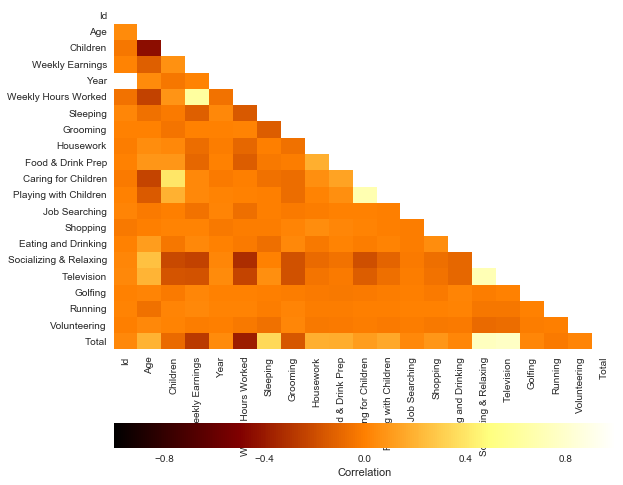

In [11]:
plt.figure(facecolor='white', frameon=False, figsize=(9,9));
sns.set_style('whitegrid');
corr_mat = train.corr();
i=1;
for index in corr_mat.index:
    corr_mat.loc[index][i:]=1;
    i=i+1;
sns.heatmap(corr_mat, cbar_kws={"orientation": "horizontal", "label": "Correlation"}, cmap='afmhot');
plt.yticks(rotation=0);

The probable columns of overlap could be<br>
    1. Food and drink prep / housework 
    2. caring for children and playing with children
    3. Television and socializing & relaxing
Now, we will look awhich two combinations sattisfy the relation of one being a subset of another

lets plot there line graph w.r.t. index

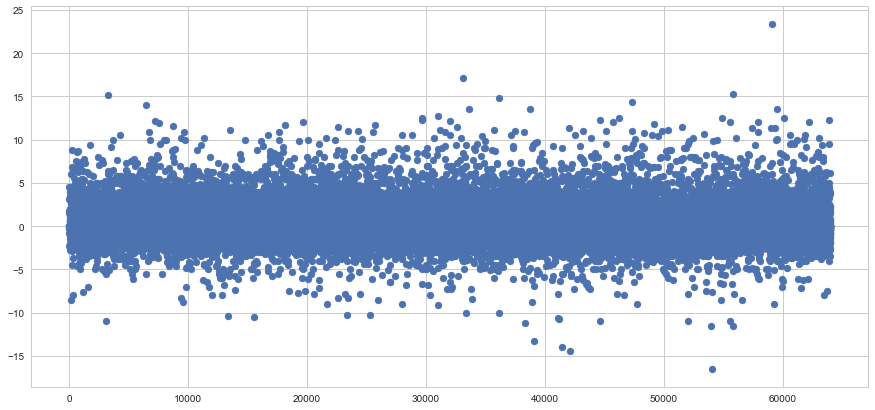

In [12]:
fig, ax = plt.subplots(figsize=(15,7));
plt.scatter(train.index,(train['Housework'] - train['Food & Drink Prep']));

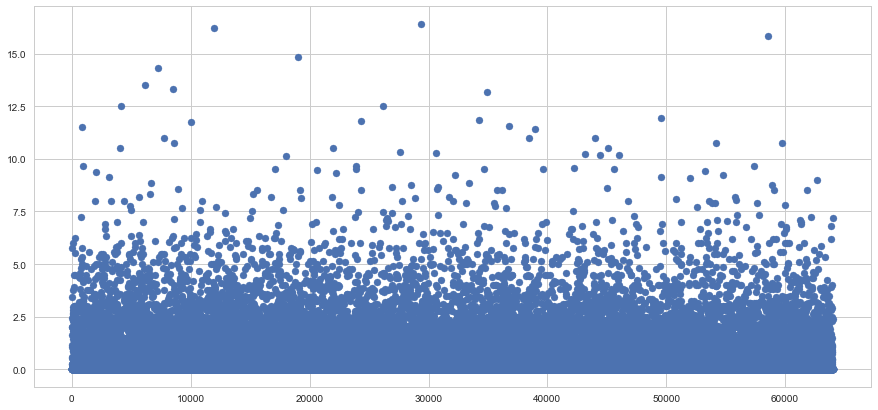

In [13]:
fig, ax = plt.subplots(figsize=(15,7));
plt.scatter(train.index,(train['Caring for Children'] - train['Playing with Children']));

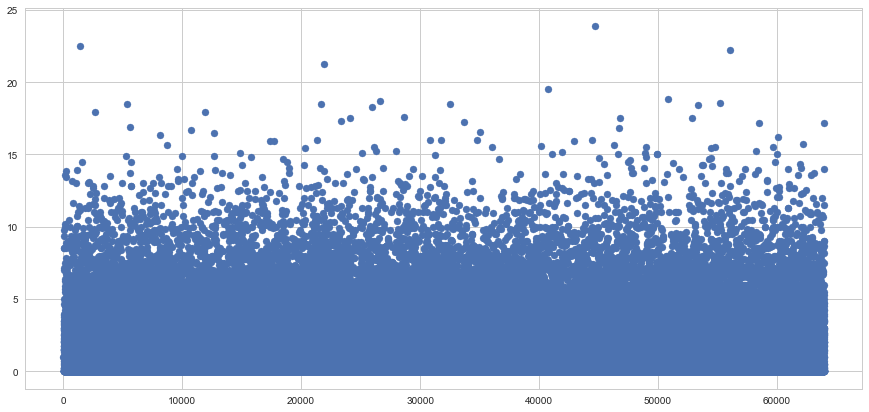

In [14]:
fig, ax = plt.subplots(figsize=(15,7));
plt.scatter(train.index,(train['Socializing & Relaxing'] - train['Television']));

After looking at the correlation matrix and the scatter plots of the difference value of the pair, we can say that columns of overlap could be

2. caring for children and playing with children
3. Television and socializing & relaxing


In [15]:
train['Socializing & Relaxing excluding TV'] =  train['Socializing & Relaxing'] - train['Television'];
train['Caring for Children excluding Play'] =  train['Caring for Children'] - train['Playing with Children'];

In [16]:
train.dtypes

Id                                       int64
Education Level                         object
Age                                      int64
Age Range                               object
Employment Status                       object
Gender                                  object
Children                                 int64
Weekly Earnings                          int64
Year                                     int64
Weekly Hours Worked                      int64
Sleeping                               float64
Grooming                               float64
Housework                              float64
Food & Drink Prep                      float64
Caring for Children                    float64
Playing with Children                  float64
Job Searching                          float64
Shopping                               float64
Eating and Drinking                    float64
Socializing & Relaxing                 float64
Television                             float64
Golfing      

In [17]:
train['Daily Hours Worked'] = train['Weekly Hours Worked']/7;
train['Daily Earnings'] = train['Weekly Earnings']/7;

In [18]:
train.columns

Index(['Id', 'Education Level', 'Age', 'Age Range', 'Employment Status',
       'Gender', 'Children', 'Weekly Earnings', 'Year', 'Weekly Hours Worked',
       'Sleeping', 'Grooming', 'Housework', 'Food & Drink Prep',
       'Caring for Children', 'Playing with Children', 'Job Searching',
       'Shopping', 'Eating and Drinking', 'Socializing & Relaxing',
       'Television', 'Golfing', 'Running', 'Volunteering', 'Total',
       'Socializing & Relaxing excluding TV',
       'Caring for Children excluding Play', 'Daily Hours Worked',
       'Daily Earnings'],
      dtype='object')

In [19]:
activities = ['Sleeping', 'Grooming', 'Housework', 'Food & Drink Prep',
       'Playing with Children', 'Job Searching', 'Shopping', 'Eating and Drinking',
       'Television', 'Golfing', 'Running', 'Volunteering',
       'Socializing & Relaxing excluding TV','Caring for Children excluding Play',
       'Daily Hours Worked']

In [20]:
#sns.set_palette('husl')#sns.color_palette("Paired"));
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71",
          "#8B4513", "#227800", "#00FFF3", "#002EFF", "#D800FF", "#9300FF",
          "#F0A32F", "#844D9E", "#EC4A94","#ee4b22"]
sns.set_palette(sns.color_palette(flatui))


## Q1

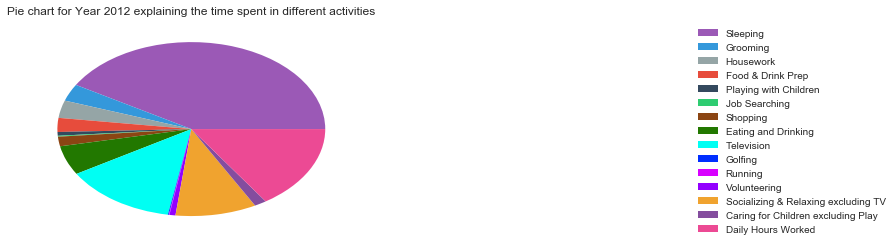

In [21]:
plt.figure();
plt.pie(train.groupby('Year').sum().loc[2012,activities], startangle=0 );
ax= plt.gca();
ax.set_title('Pie chart for Year {}'.format('2012') + ' explaining the time spent in different activities');
ax.legend(loc= (2,0), labels=activities);

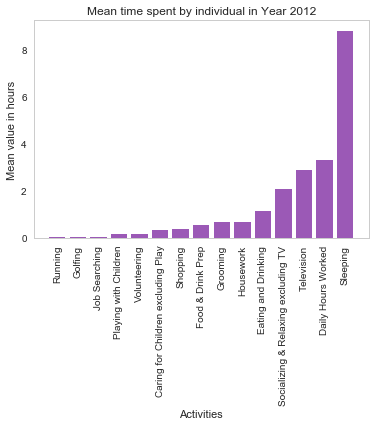

In [22]:
height = train.groupby('Year').mean().loc[2012,activities].sort_values()
plt.bar(np.arange(len(activities)), height = height);
ax = plt.gca();
ax.set_xticklabels(height.index, rotation = 'vertical');
ax.set_xticks(np.arange(len(activities)))
ax.set_title('Mean time spent by individual in Year 2012');
ax.set_xlabel('Activities');
ax.set_ylabel('Mean value in hours');
ax.grid('off');

In [26]:
train[train['Year']==2012].groupby('Employment Status').mean()

,Id,Age,Children,Weekly Earnings,Year,Weekly Hours Worked,Sleeping,Grooming,Housework,Food & Drink Prep,...,Socializing & Relaxing,Television,Golfing,Running,Volunteering,Total,Socializing & Relaxing excluding TV,Caring for Children excluding Play,Daily Hours Worked,Daily Earnings
Employment Status,,,,,,,,,,,,,,,,,,,,,
Employed,60038.021444,43.398543,0.924944,808.461865,2012.0,37.635039,8.583915,0.696676,0.589960,0.464200,...,4.005116,2.288038,0.026219,0.016314,0.145025,19.016657,1.717079,0.340162,5.376434,115.494552
Not in labor force,59996.741007,56.841348,0.609618,0.000000,2012.0,0.000000,9.173824,0.639065,0.859106,0.687887,...,6.657679,3.916024,0.025456,0.008523,0.171810,24.214029,2.741655,0.256017,0.000000,0.000000
Unemployed,59685.067146,37.062350,1.055156,0.000000,2012.0,0.000000,9.483789,0.611942,0.814988,0.744940,...,5.724844,3.492638,0.005995,0.012782,0.147074,23.550759,2.232206,0.342902,0.000000,0.000000


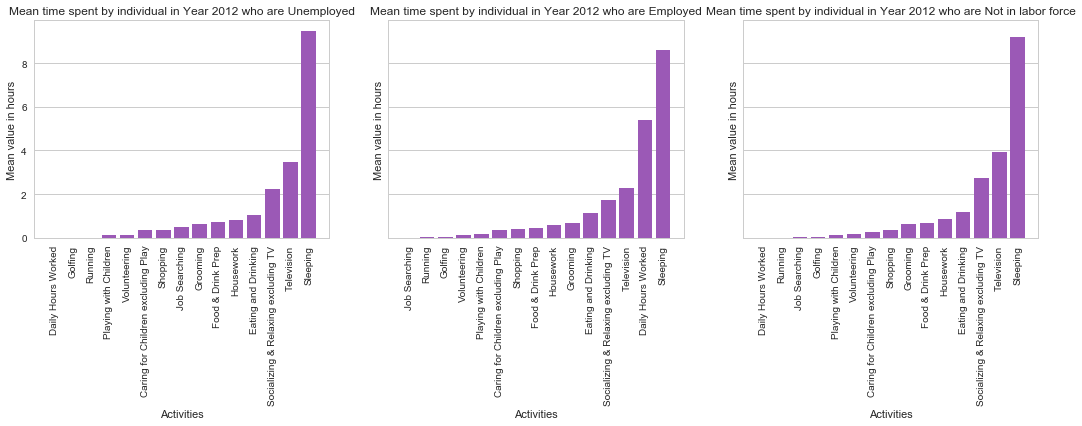

In [27]:
fig, ax = plt.subplots(1,3, figsize=(18,4), sharey=True);
for i,emp in enumerate(train['Employment Status'].unique()):
    height = train[train['Employment Status']==emp].groupby('Year').mean().loc[2012,activities].sort_values();
    ax[i].bar(np.arange(len(activities)),height, label = emp);
    ax[i].set_xticklabels(height.index, rotation = 'vertical');
    ax[i].set_xticks(np.arange(len(activities)));
    ax[i].set_title('Mean time spent by individual in Year 2012 who are {}'.format(emp));
    ax[i].set_xlabel('Activities');
    ax[i].set_ylabel('Mean value in hours');
    ax[i].grid( axis='x');
#ax.legend();

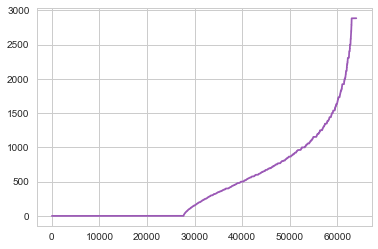

In [28]:
plt.plot(np.sort(train['Weekly Earnings']));

In [29]:
def sort_earning(line):
    if line == 0:
        return '0'
    elif ((line>0) & (line < 500)):
        return '0-500'
    elif (line >=500) & (line < 1000):
        return '500-1000'
    elif (line >=1000) & (line < 1500):
        return '1000-1500'
    elif (line >=1500) & (line < 2000):
        return '1500-2000'
    elif (line >=2000) & (line < 2500):
        return '2000-2500'
    else:
        return '2500 and above'

In [30]:
train['earning range'] = train['Weekly Earnings'].map(sort_earning)

In [40]:
earning_range = ['0',  '0-500','500-1000','1000-1500',  '1500-2000', '2000-2500',
       '2500 and above']

In [31]:
def sort_education(line):
    if ((line == 'High School') | (line == '9th grade') | (line =='10th grade') |(line == '11th grade') | (line =='12th grade')):
        return 'School'
    elif ((line == 'Bachelor') | (line =='Some College') | (line =='Associate Degree') | (line =='Prof. Degree')):
        return 'Bachelor'
    else:
        return str(line)

In [32]:
train['Education range'] = train['Education Level'].map(sort_education)

In [33]:
train['Education range'].unique()

array(['School', 'Bachelor', 'Master', 'Doctoral Degree'], dtype=object)

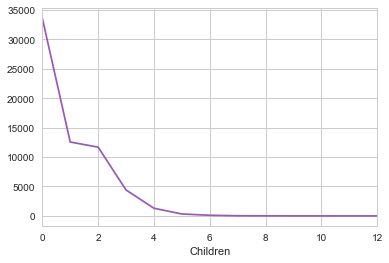

In [34]:
train.groupby('Children').count()['Id'].plot();

In [35]:
def sort_children(line):
    if line > 5:
        return 'more than 5'
    else: return str(line)
    

In [36]:
train['children_sorted'] = train['Children'].map(sort_children)

In [37]:
filter_columns = train.columns[[3,4,5,-1,-2,-3]]

In [38]:
filter_columns

Index(['Age Range', 'Employment Status', 'Gender', 'children_sorted',
       'Education range', 'earning range'],
      dtype='object')

## Q2

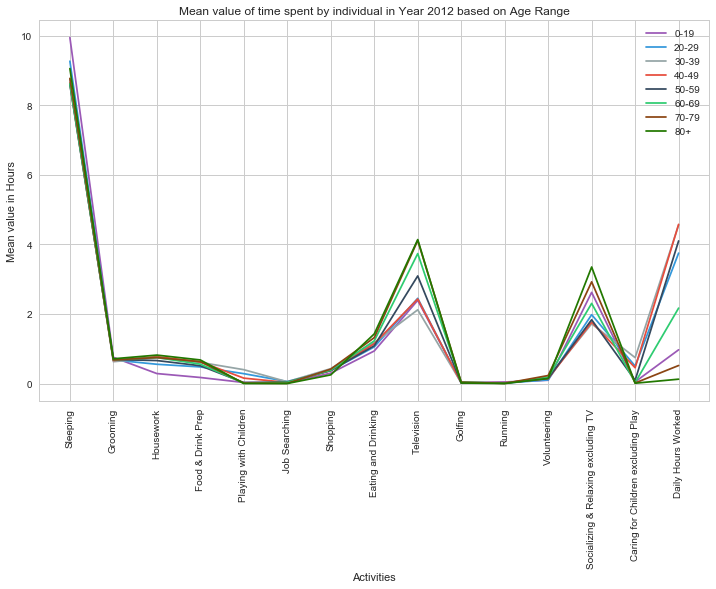

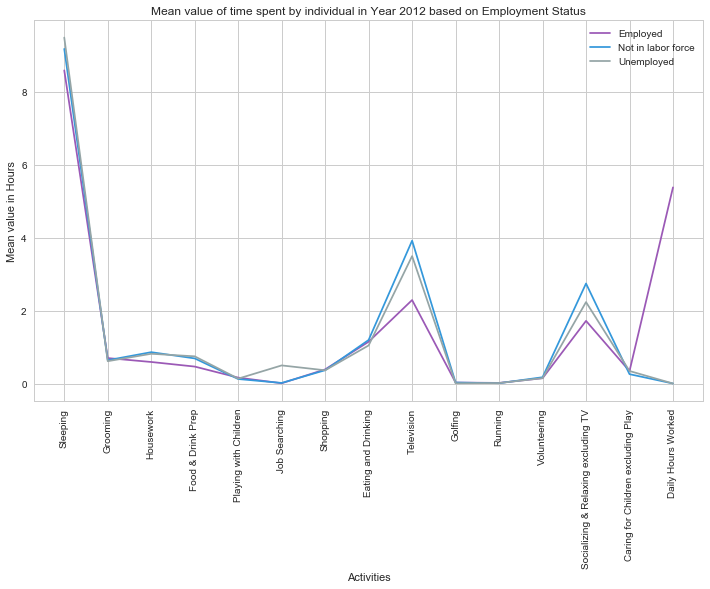

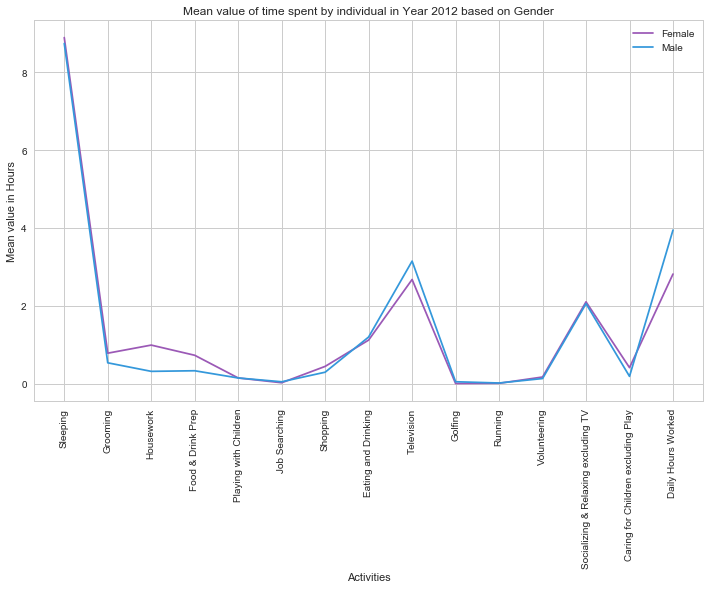

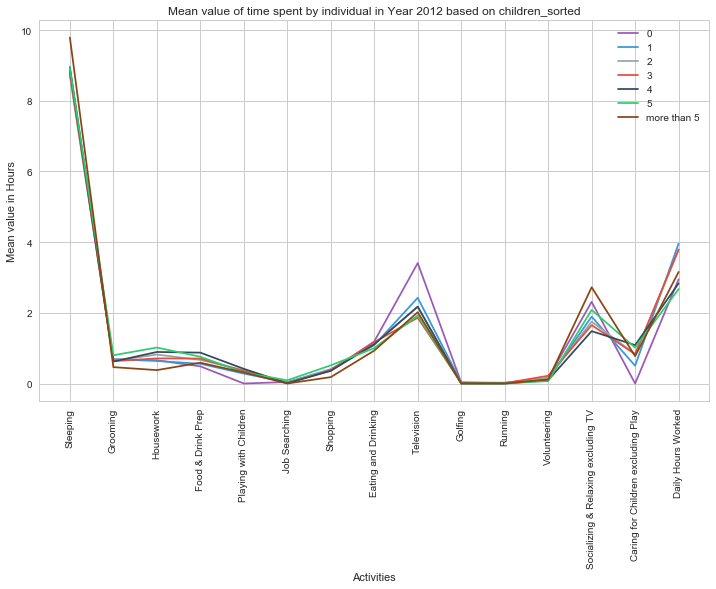

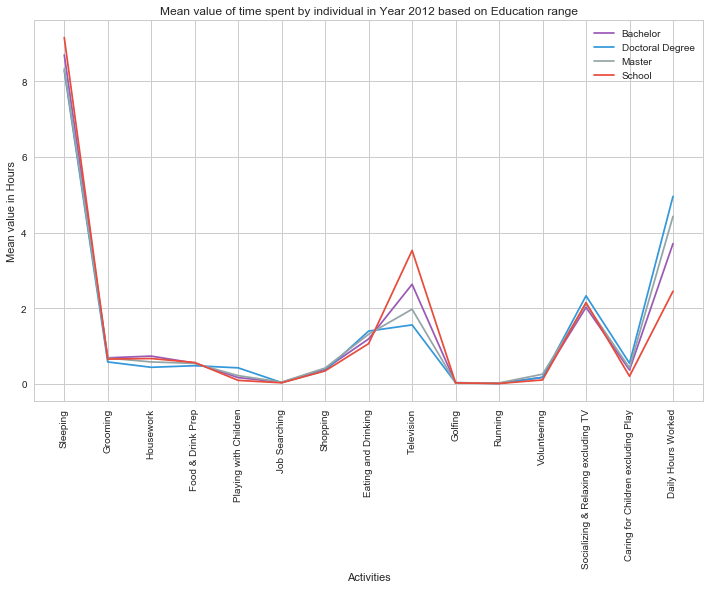

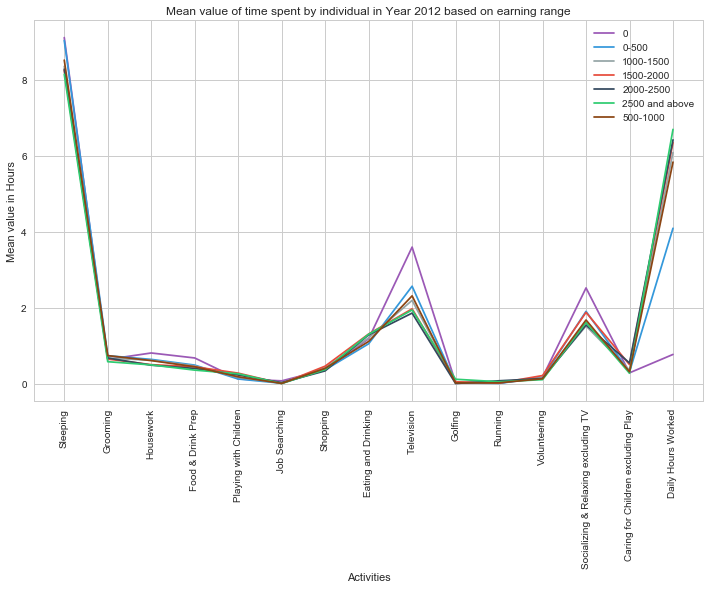

In [36]:
for col in filter_columns:
    sns.set_style(style='whitegrid');
    fig,ax = plt.subplots(figsize=(12,7));
    grouped = train[train['Year']==2012].groupby(col);
    for name, group in grouped:
        plt.plot(np.arange(len(activities)), group.mean().loc[activities].values, label = name);
        ax= plt.gca();
        ax.set_xticklabels(activities, rotation = 'vertical');
        ax.set_xticks(np.arange(len(activities)));
        ax.set_title('Mean value of time spent by individual in Year 2012 based on {}'.format(col));
        ax.set_xlabel('Activities');
        ax.set_ylabel('Mean value in Hours');
        #ax.grid('off');
        ax.legend();

## Q3

In [42]:
years = train['Year'].unique();

In [43]:
filter_columns

Index(['Age Range', 'Employment Status', 'Gender', 'children_sorted',
       'Education range', 'earning range'],
      dtype='object')

In [44]:
childcare = ['Caring for Children excluding Play','Playing with Children']

In [47]:
ax.bar?

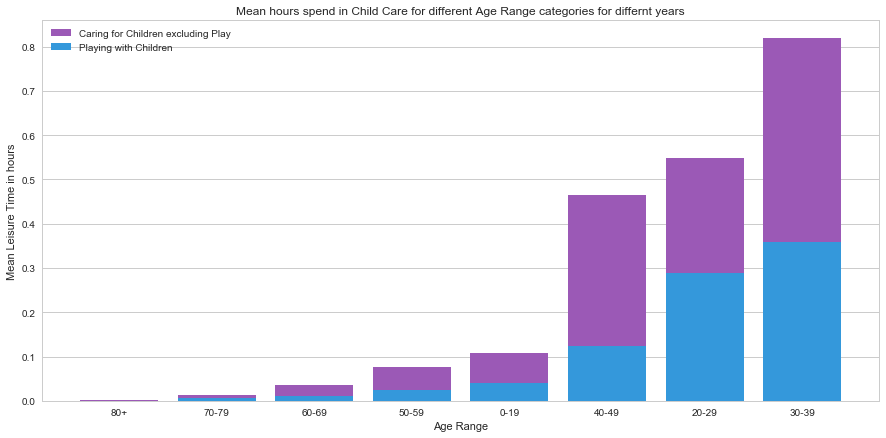

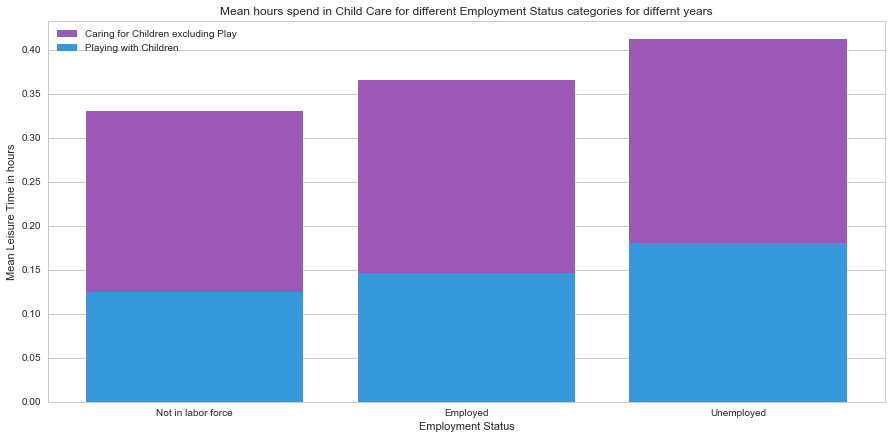

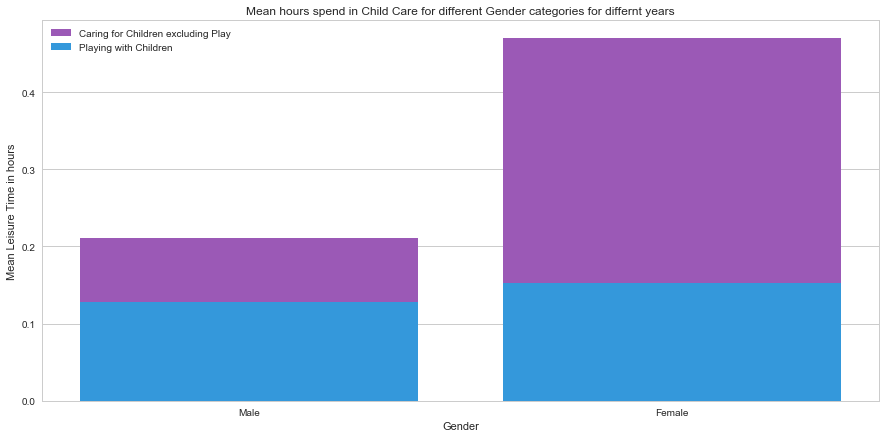

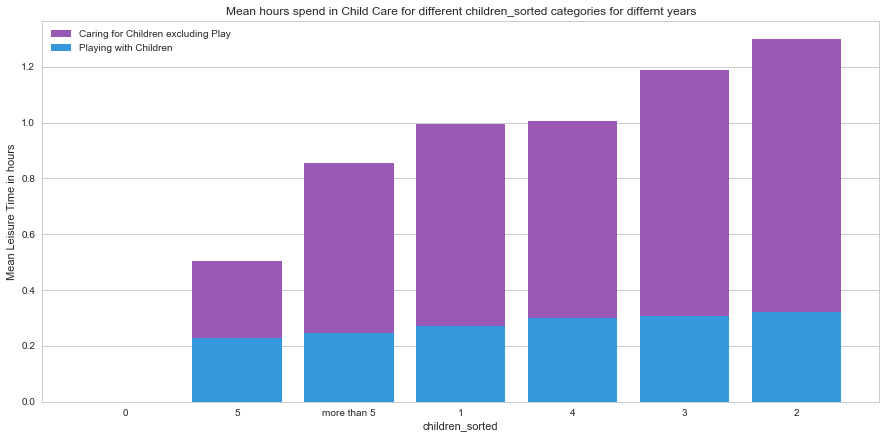

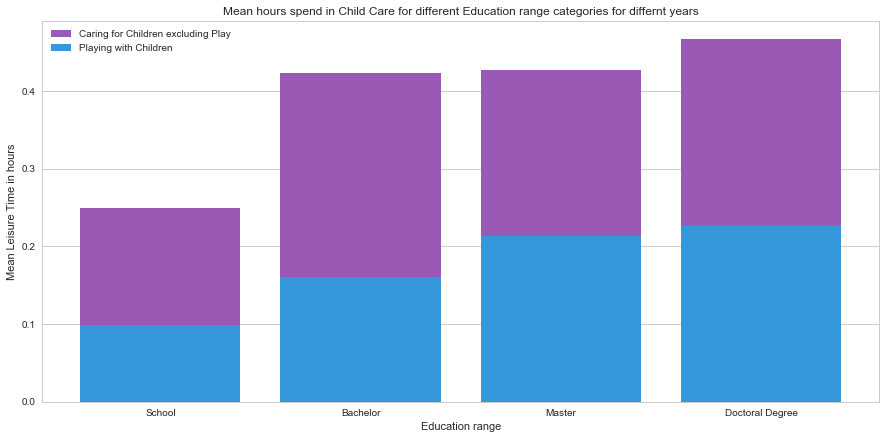

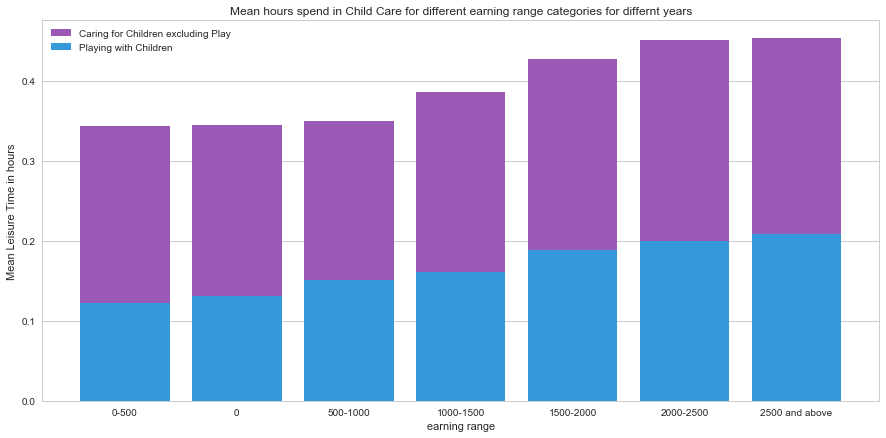

In [55]:
for col in filter_columns:
    fig, ax = plt.subplots(figsize=(15,7));
    grouped = train.groupby(col).mean();
    for i in range(0,2):
        grouped = grouped.sort_values(childcare[i])
        ax.bar(np.arange(len(grouped.index)), grouped[childcare[i]], label=childcare[i])
    ax.set_xticks(np.arange(len(grouped.index)));
    ax.set_xticklabels(list(grouped['Caring for Children'].index));
    ax.set_title('Mean hours spend in Child Care for different {} categories for differnt years'.format(col));
    ax.set_xlabel(col);
    ax.set_ylabel('Mean Leisure Time in hours');
    ax.grid(axis='x')
    ax.legend();

Ques4. How is leisure time changing based on income and is there a difference between generations leisure spending time?

Assumption: Leisure time is sum of Shopping, Socializing & Relaxing, Television and Golfing

In [57]:
train['Leisure Time'] = train['Shopping'] + train['Socializing & Relaxing'] + train['Television'] + train['Golfing']

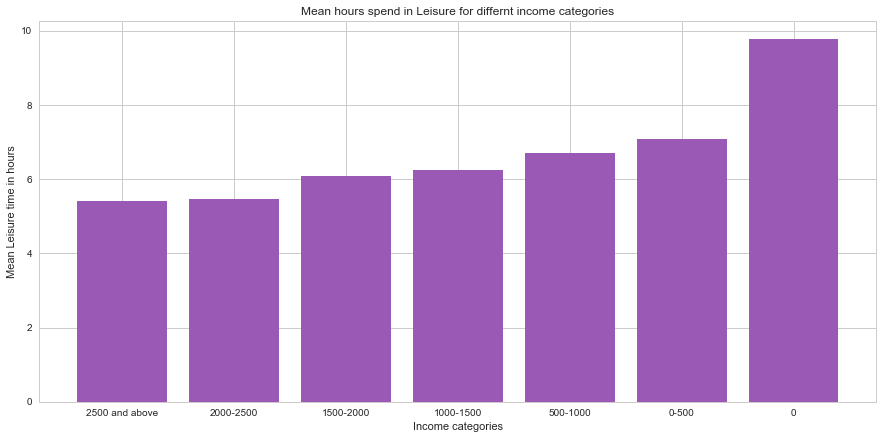

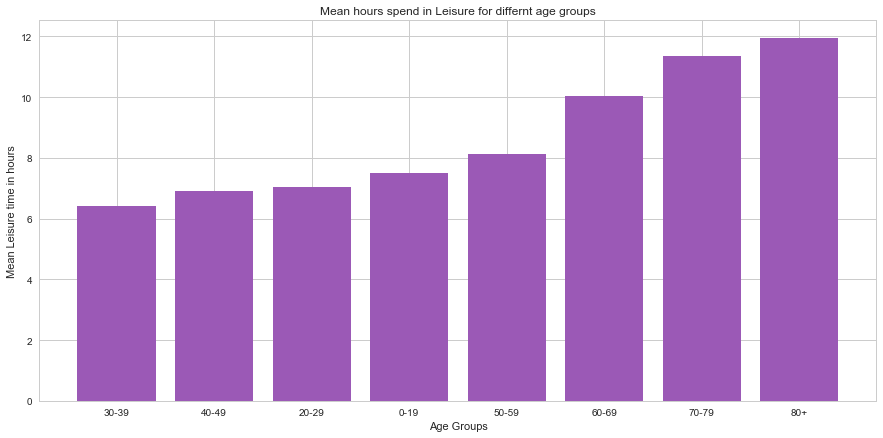

In [60]:
grouped = train.groupby('earning range').mean().sort_values(by='Leisure Time');
fig, ax= plt.subplots(figsize=(15,7));
ax.bar(np.arange(len(grouped.index)), grouped['Leisure Time']);
ax.set_xticks(np.arange(len(grouped.index)));
ax.set_xticklabels(list(grouped['Leisure Time'].index));
ax.set_title('Mean hours spend in Leisure for differnt income categories');
ax.set_xlabel('Income categories');
ax.set_ylabel('Mean Leisure time in hours');

grouped = train.groupby('Age Range').mean().sort_values(by='Leisure Time');
fig, ax= plt.subplots(figsize=(15,7));
ax.bar(np.arange(len(grouped.index)), grouped['Leisure Time'].sort_values());
ax.set_xticks(np.arange(len(grouped.index)));
ax.set_xticklabels(list(grouped['Leisure Time'].index));
ax.set_title('Mean hours spend in Leisure for differnt age groups');
ax.set_xlabel('Age Groups');
ax.set_ylabel('Mean Leisure time in hours');




Q5

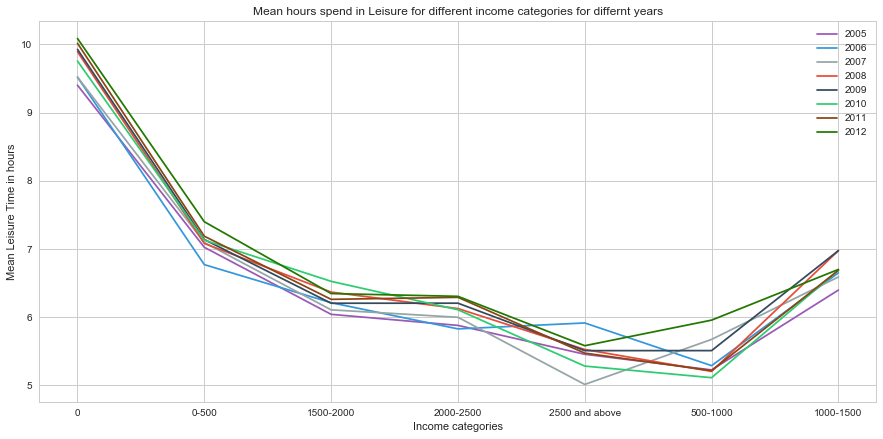

In [61]:
fig, ax = plt.subplots(figsize=(15,7));
for year in train['Year'].unique():
    grouped = train[train['Year']==year].groupby('earning range').mean();
    ax.plot(np.arange(len(grouped.index)), grouped['Leisure Time'], label=year);
    ax.set_xticks([np.arange(len(grouped.index))]);
    ax.set_xticklabels(list(grouped['Leisure Time'].index));
    ax.set_title('Mean hours spend in Leisure for different income categories for differnt years');
    ax.set_xlabel('Income categories');
    ax.set_ylabel('Mean Leisure Time in hours');
    ax.legend();

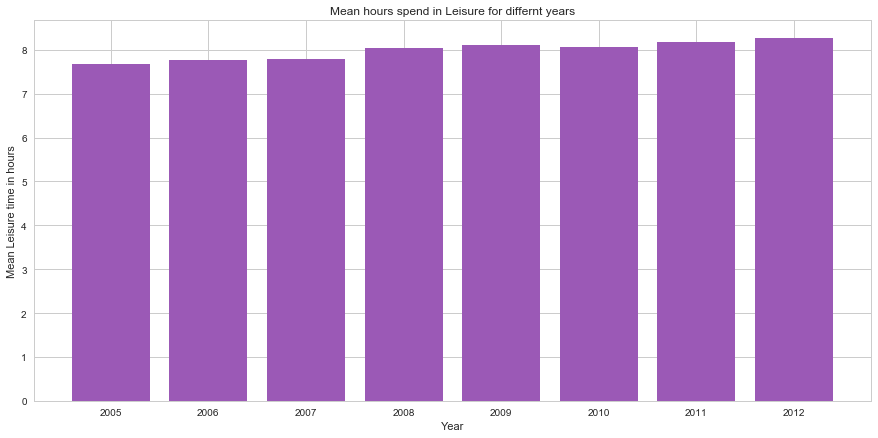

In [44]:
grouped = train.groupby('Year').mean();
fig, ax= plt.subplots(figsize=(15,7));
ax.bar(np.arange(len(grouped.index)), grouped['Leisure Time']);
ax.set_xticks(np.arange(len(grouped.index)));
ax.set_xticklabels(list(grouped['Leisure Time'].index));
ax.set_title('Mean hours spend in Leisure for differnt years');
ax.set_xlabel('Year');
ax.set_ylabel('Mean Leisure time in hours');

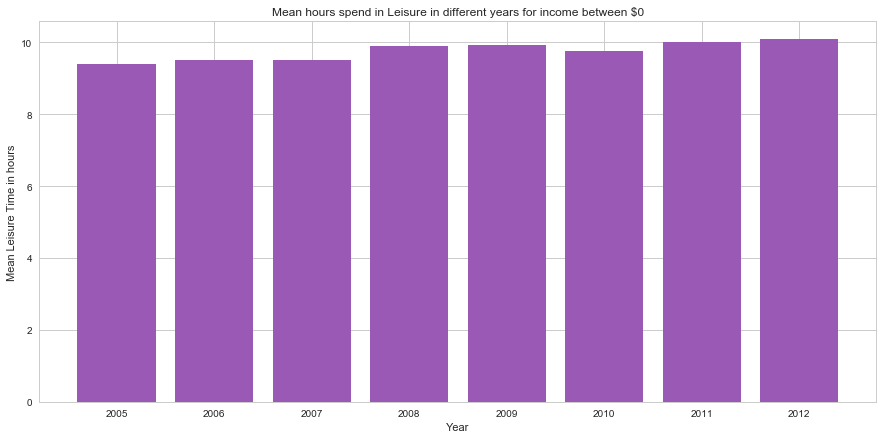

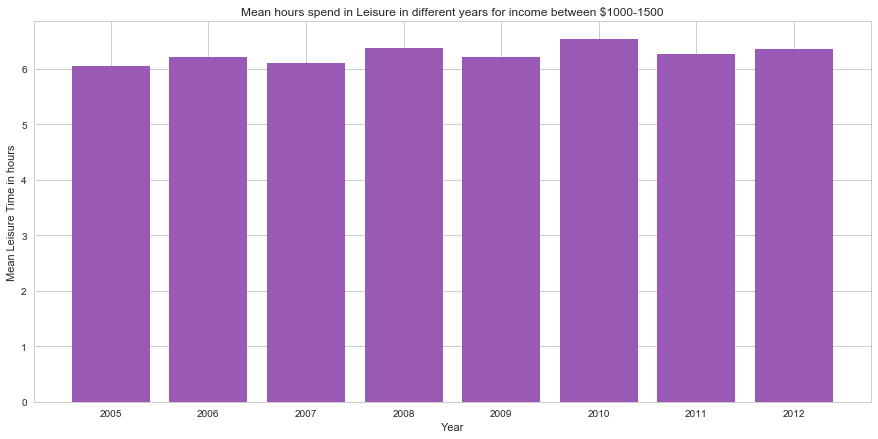

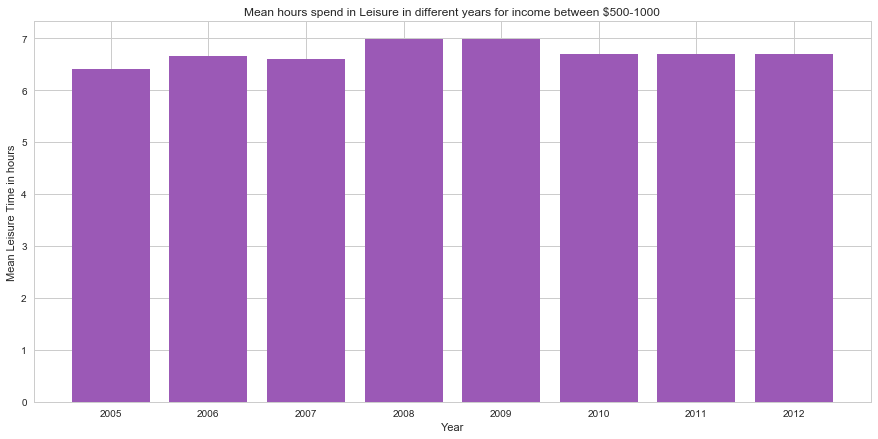

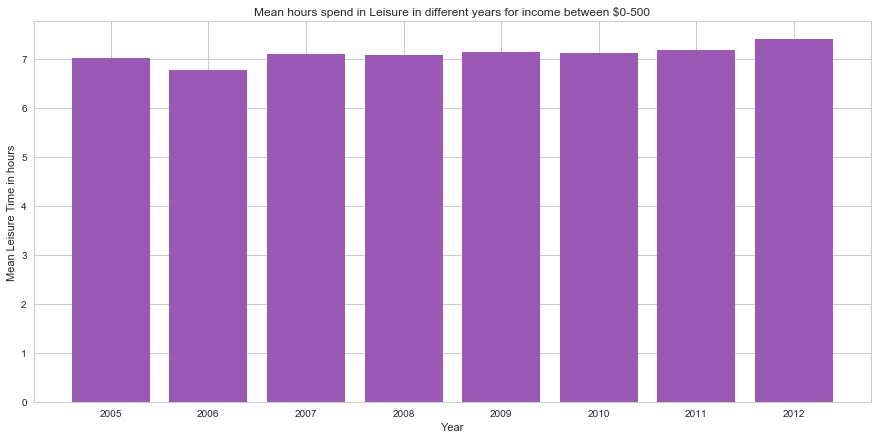

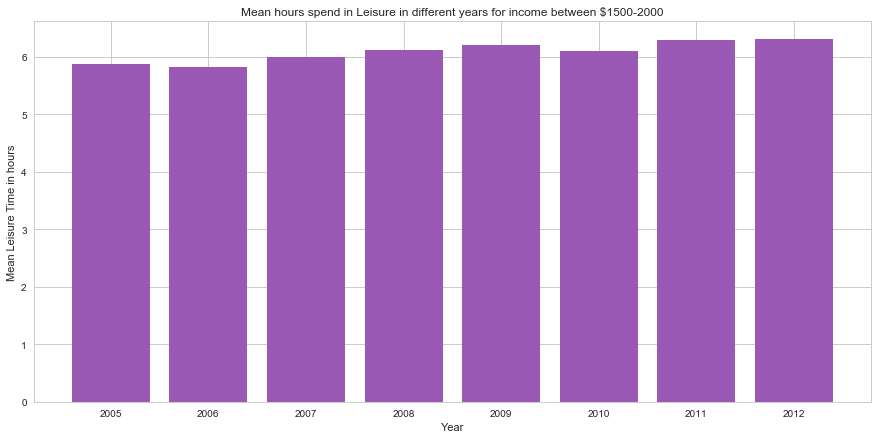

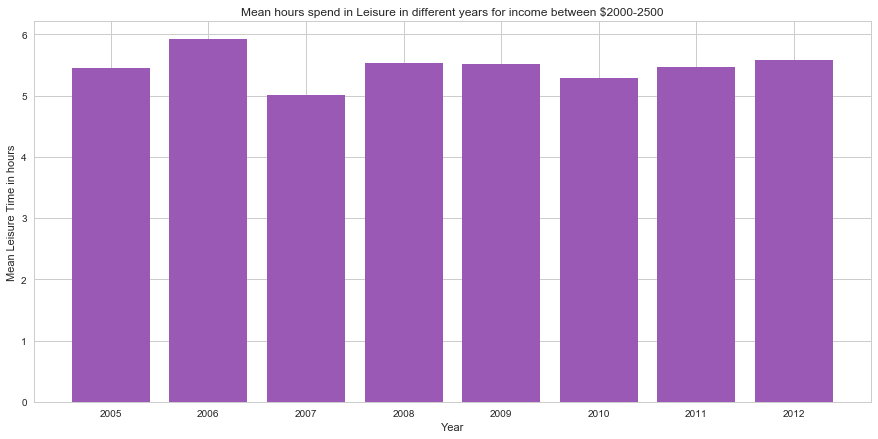

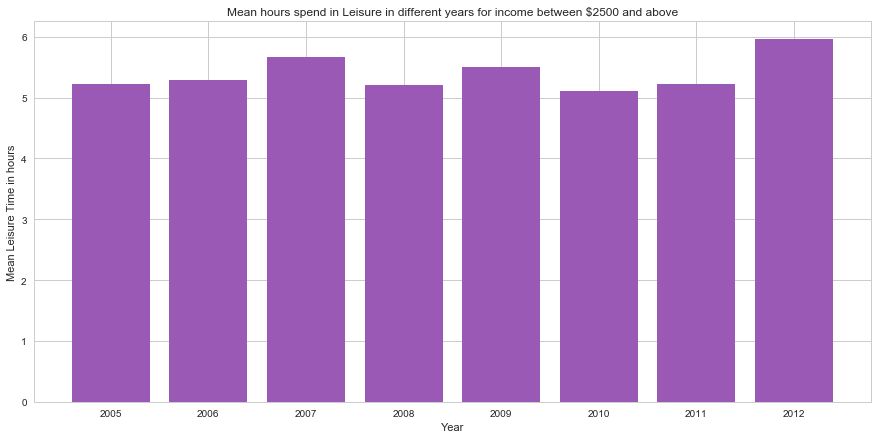

In [45]:
for ran in train['earning range'].unique():
    fig, ax = plt.subplots(figsize=(15,7));
    grouped = train[train['earning range']==ran].groupby('Year').mean();
    ax.bar(np.arange(len(grouped.index)), grouped['Leisure Time']);
    ax.set_xticks(np.arange(len(grouped.index)));
    ax.set_xticklabels(list(grouped['Leisure Time'].index));
    ax.set_title('Mean hours spend in Leisure in different years for income between ${}'.format(ran));
    ax.set_xlabel('Year');
    ax.set_ylabel('Mean Leisure Time in hours');

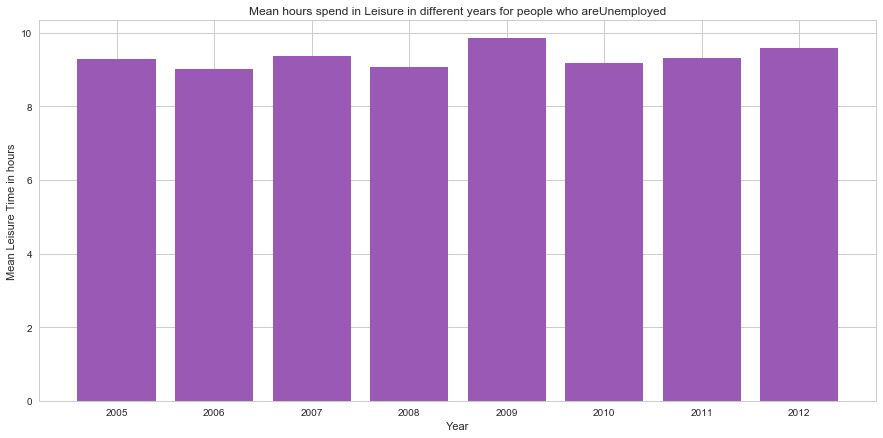

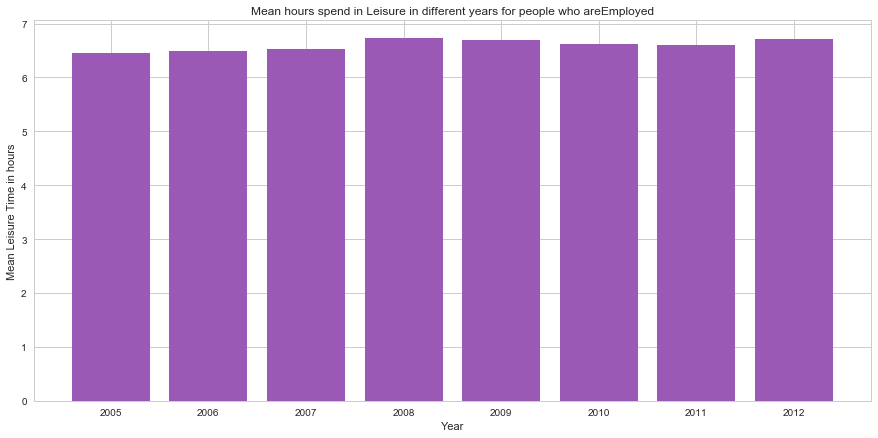

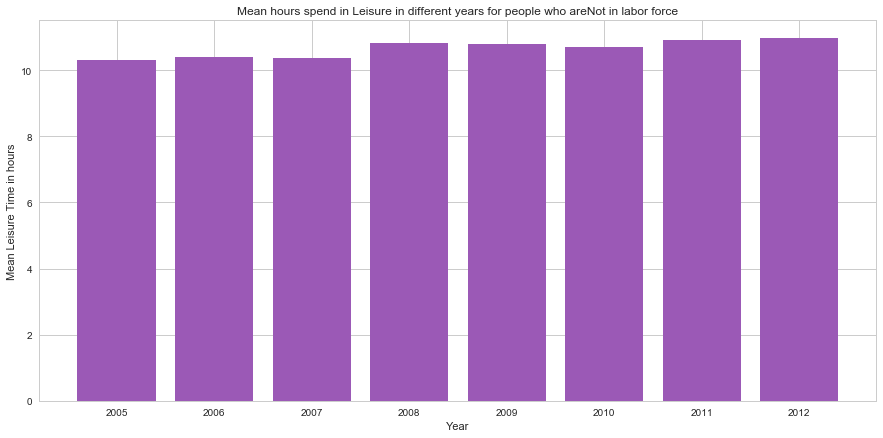

In [46]:
for emp in train['Employment Status'].unique():
    fig, ax = plt.subplots(figsize=(15,7));
    grouped = train[train['Employment Status']==emp].groupby('Year').mean();
    ax.bar(np.arange(len(grouped.index)), grouped['Leisure Time']);
    ax.set_xticks(np.arange(len(grouped.index)));
    ax.set_xticklabels(list(grouped['Leisure Time'].index));
    ax.set_title('Mean hours spend in Leisure in different years for people who are{}'.format(emp));
    ax.set_xlabel('Year');
    ax.set_ylabel('Mean Leisure Time in hours');

Q6

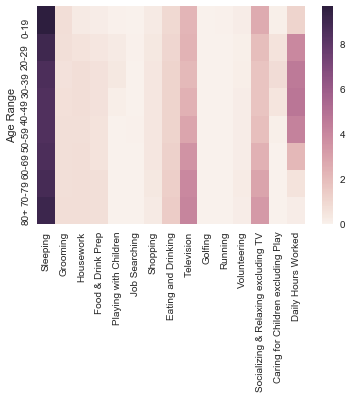

In [47]:
sns.heatmap(train.groupby('Age Range').mean()[activities])